# Multi-Class Classification with a Neural Network

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [2]:
train_dataset = h5py.File('train_signs.h5', "r")
x_train = np.array(train_dataset["train_set_x"][:]) 
y_train = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('test_signs.h5', "r")
x_test = np.array(test_dataset["test_set_x"][:]) 
y_test = np.array(test_dataset["test_set_y"][:])

In [3]:
X_train = np.reshape(x_train, (x_train.shape[0], -1))
Y_train = np.reshape(np.eye(6)[y_train],(-1,6))

X_test = np.reshape(x_test, (x_test.shape[0], -1))
Y_test = np.reshape(np.eye(6)[y_test],(-1,6))

It's a 5


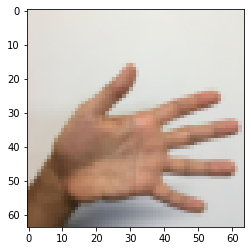

In [4]:
index = 0
plt.imshow(np.reshape(X_train[index,:], (64,64,3)))
print("It's a {}".format(y_train[index]))

In [5]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    f1 = tf.keras.layers.Lambda(lambda x: x/255.)
    f2 = tf.keras.layers.Dense(dims[1], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f3 = tf.keras.layers.Dense(dims[2], 
                               activation='relu', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    f4 = tf.keras.layers.Dense(dims[-1], 
                               activation='softmax', 
                               kernel_initializer='he_uniform', 
                               bias_initializer='zeros')
    x = tf.keras.Input(shape=(dims[0]))
    a1 = f1(x)
    a2 = f2(a1)
    a3 = f3(a2)
    y = f4(a3)
    model = tf.keras.Model(x, y) 
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
    return model

In [6]:
model = Model({'dims': [X_train.shape[1], 25, 12, Y_train.shape[1]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 1500, 
               'learning_rate': 0.0001,
               'batch_size': 32})

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 12288)]           0         
_________________________________________________________________
lambda (Lambda)              (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 25)                307225    
_________________________________________________________________
dense_1 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
Total params: 307,615
Trainable params: 307,615
Non-trainable params: 0
_________________________________________________________________
Train on 1080 samples
Epoch 1/1500
1080/1080 [==============================] - 0s 327us/sample - loss: 1.8577 - categori

1080/1080 [==============================] - 0s 67us/sample - loss: 1.3439 - categorical_accuracy: 0.4398
Epoch 61/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 1.3316 - categorical_accuracy: 0.4704
Epoch 62/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 1.3208 - categorical_accuracy: 0.4722
Epoch 63/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 1.3293 - categorical_accuracy: 0.4611
Epoch 64/1500
1080/1080 [==============================] - 0s 60us/sample - loss: 1.3279 - categorical_accuracy: 0.4657
Epoch 65/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 1.3172 - categorical_accuracy: 0.4620
Epoch 66/1500
1080/1080 [==============================] - 0s 67us/sample - loss: 1.3076 - categorical_accuracy: 0.4639
Epoch 67/1500
1080/1080 [==============================] - 0s 70us/sample - loss: 1.2997 - categorical_accuracy: 0.4685
Epoch 68/1500
1080/1080 [=============================

1080/1080 [==============================] - 0s 69us/sample - loss: 1.1313 - categorical_accuracy: 0.5315
Epoch 129/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 1.1386 - categorical_accuracy: 0.5287
Epoch 130/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 1.1290 - categorical_accuracy: 0.5398
Epoch 131/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 1.1393 - categorical_accuracy: 0.5287
Epoch 132/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 1.1418 - categorical_accuracy: 0.5185
Epoch 133/1500
1080/1080 [==============================] - 0s 68us/sample - loss: 1.1494 - categorical_accuracy: 0.5120
Epoch 134/1500
1080/1080 [==============================] - 0s 67us/sample - loss: 1.1213 - categorical_accuracy: 0.5315
Epoch 135/1500
1080/1080 [==============================] - 0s 67us/sample - loss: 1.1136 - categorical_accuracy: 0.5454
Epoch 136/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 65us/sample - loss: 1.0119 - categorical_accuracy: 0.5889
Epoch 196/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 1.0073 - categorical_accuracy: 0.5870
Epoch 197/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 1.0082 - categorical_accuracy: 0.6019
Epoch 198/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 1.0079 - categorical_accuracy: 0.5954
Epoch 199/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 1.0040 - categorical_accuracy: 0.6000
Epoch 200/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 1.0047 - categorical_accuracy: 0.6028
Epoch 201/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 1.0084 - categorical_accuracy: 0.5981
Epoch 202/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 1.0329 - categorical_accuracy: 0.5713
Epoch 203/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 71us/sample - loss: 0.9204 - categorical_accuracy: 0.6352
Epoch 263/1500
1080/1080 [==============================] - 0s 67us/sample - loss: 0.9290 - categorical_accuracy: 0.6435
Epoch 264/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.9239 - categorical_accuracy: 0.6352
Epoch 265/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.9235 - categorical_accuracy: 0.6259
Epoch 266/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.9201 - categorical_accuracy: 0.6315
Epoch 267/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.9203 - categorical_accuracy: 0.6315
Epoch 268/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.9274 - categorical_accuracy: 0.6278
Epoch 269/1500
1080/1080 [==============================] - 0s 68us/sample - loss: 0.9144 - categorical_accuracy: 0.6380
Epoch 270/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 71us/sample - loss: 0.8636 - categorical_accuracy: 0.6657
Epoch 330/1500
1080/1080 [==============================] - 0s 68us/sample - loss: 0.8529 - categorical_accuracy: 0.6611
Epoch 331/1500
1080/1080 [==============================] - 0s 70us/sample - loss: 0.8377 - categorical_accuracy: 0.6796
Epoch 332/1500
1080/1080 [==============================] - 0s 70us/sample - loss: 0.8476 - categorical_accuracy: 0.6537
Epoch 333/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.8398 - categorical_accuracy: 0.6741
Epoch 334/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.8629 - categorical_accuracy: 0.6611
Epoch 335/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.8429 - categorical_accuracy: 0.6704
Epoch 336/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.8335 - categorical_accuracy: 0.6685
Epoch 337/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 69us/sample - loss: 0.7755 - categorical_accuracy: 0.7120
Epoch 397/1500
1080/1080 [==============================] - 0s 72us/sample - loss: 0.7743 - categorical_accuracy: 0.7093
Epoch 398/1500
1080/1080 [==============================] - 0s 72us/sample - loss: 0.7841 - categorical_accuracy: 0.7019
Epoch 399/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.7776 - categorical_accuracy: 0.7046
Epoch 400/1500
1080/1080 [==============================] - 0s 70us/sample - loss: 0.8025 - categorical_accuracy: 0.6722
Epoch 401/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.7818 - categorical_accuracy: 0.6991
Epoch 402/1500
1080/1080 [==============================] - 0s 73us/sample - loss: 0.7824 - categorical_accuracy: 0.7065
Epoch 403/1500
1080/1080 [==============================] - 0s 74us/sample - loss: 0.7748 - categorical_accuracy: 0.6972
Epoch 404/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 69us/sample - loss: 0.7464 - categorical_accuracy: 0.6991
Epoch 464/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.7180 - categorical_accuracy: 0.7370
Epoch 465/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.7198 - categorical_accuracy: 0.7315
Epoch 466/1500
1080/1080 [==============================] - 0s 60us/sample - loss: 0.7154 - categorical_accuracy: 0.7380
Epoch 467/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.7191 - categorical_accuracy: 0.7259
Epoch 468/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.7563 - categorical_accuracy: 0.7111
Epoch 469/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.7177 - categorical_accuracy: 0.7352
Epoch 470/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.7148 - categorical_accuracy: 0.7296
Epoch 471/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 70us/sample - loss: 0.6763 - categorical_accuracy: 0.7435
Epoch 531/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.6661 - categorical_accuracy: 0.7602
Epoch 532/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.6666 - categorical_accuracy: 0.7676
Epoch 533/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.6569 - categorical_accuracy: 0.7565
Epoch 534/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.6621 - categorical_accuracy: 0.7741
Epoch 535/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.6582 - categorical_accuracy: 0.7574
Epoch 536/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.6569 - categorical_accuracy: 0.7685
Epoch 537/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.6630 - categorical_accuracy: 0.7583
Epoch 538/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 66us/sample - loss: 0.6193 - categorical_accuracy: 0.7722
Epoch 598/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.6263 - categorical_accuracy: 0.7787
Epoch 599/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.6332 - categorical_accuracy: 0.7639
Epoch 600/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.6099 - categorical_accuracy: 0.7787
Epoch 601/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.6323 - categorical_accuracy: 0.7694
Epoch 602/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.6185 - categorical_accuracy: 0.7852
Epoch 603/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.6101 - categorical_accuracy: 0.7843
Epoch 604/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.6226 - categorical_accuracy: 0.7750
Epoch 605/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 65us/sample - loss: 0.5797 - categorical_accuracy: 0.7861
Epoch 665/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.5888 - categorical_accuracy: 0.7750
Epoch 666/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.5794 - categorical_accuracy: 0.7954
Epoch 667/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.5703 - categorical_accuracy: 0.7991
Epoch 668/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.5764 - categorical_accuracy: 0.7898
Epoch 669/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.5643 - categorical_accuracy: 0.8102
Epoch 670/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.5683 - categorical_accuracy: 0.8028
Epoch 671/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.5789 - categorical_accuracy: 0.7907
Epoch 672/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 64us/sample - loss: 0.5448 - categorical_accuracy: 0.7963
Epoch 732/1500
1080/1080 [==============================] - 0s 68us/sample - loss: 0.5337 - categorical_accuracy: 0.8213
Epoch 733/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.5308 - categorical_accuracy: 0.8167
Epoch 734/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.5299 - categorical_accuracy: 0.8130
Epoch 735/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.5294 - categorical_accuracy: 0.8139
Epoch 736/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.5316 - categorical_accuracy: 0.8213
Epoch 737/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.5203 - categorical_accuracy: 0.8231
Epoch 738/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.5487 - categorical_accuracy: 0.8065
Epoch 739/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 64us/sample - loss: 0.5013 - categorical_accuracy: 0.8370
Epoch 799/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.5123 - categorical_accuracy: 0.8194
Epoch 800/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.4945 - categorical_accuracy: 0.8315
Epoch 801/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.5370 - categorical_accuracy: 0.8019
Epoch 802/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.5169 - categorical_accuracy: 0.8231
Epoch 803/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.4878 - categorical_accuracy: 0.8333
Epoch 804/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.4949 - categorical_accuracy: 0.8352
Epoch 805/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.4909 - categorical_accuracy: 0.8417
Epoch 806/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 66us/sample - loss: 0.4525 - categorical_accuracy: 0.8583
Epoch 866/1500
1080/1080 [==============================] - 0s 68us/sample - loss: 0.4655 - categorical_accuracy: 0.8537
Epoch 867/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.4600 - categorical_accuracy: 0.8546
Epoch 868/1500
1080/1080 [==============================] - 0s 68us/sample - loss: 0.4652 - categorical_accuracy: 0.8454
Epoch 869/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.4498 - categorical_accuracy: 0.8565
Epoch 870/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.4651 - categorical_accuracy: 0.8463
Epoch 871/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.4861 - categorical_accuracy: 0.8296
Epoch 872/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.4718 - categorical_accuracy: 0.8481
Epoch 873/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 66us/sample - loss: 0.4226 - categorical_accuracy: 0.8722
Epoch 933/1500
1080/1080 [==============================] - 0s 67us/sample - loss: 0.4283 - categorical_accuracy: 0.8639
Epoch 934/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.4298 - categorical_accuracy: 0.8602
Epoch 935/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.4204 - categorical_accuracy: 0.8704
Epoch 936/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.4373 - categorical_accuracy: 0.8537
Epoch 937/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.4308 - categorical_accuracy: 0.8639
Epoch 938/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.4334 - categorical_accuracy: 0.8648
Epoch 939/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.4270 - categorical_accuracy: 0.8722
Epoch 940/1500
1080/1080 [=====================

1080/1080 [==============================] - 0s 61us/sample - loss: 0.4151 - categorical_accuracy: 0.8722
Epoch 1000/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.4086 - categorical_accuracy: 0.8741
Epoch 1001/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.3943 - categorical_accuracy: 0.8852
Epoch 1002/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.3951 - categorical_accuracy: 0.8787
Epoch 1003/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.3964 - categorical_accuracy: 0.8769
Epoch 1004/1500
1080/1080 [==============================] - 0s 60us/sample - loss: 0.3918 - categorical_accuracy: 0.8852
Epoch 1005/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.4107 - categorical_accuracy: 0.8694
Epoch 1006/1500
1080/1080 [==============================] - 0s 62us/sample - loss: 0.3937 - categorical_accuracy: 0.8815
Epoch 1007/1500
1080/1080 [=============

1080/1080 [==============================] - 0s 63us/sample - loss: 0.3628 - categorical_accuracy: 0.8991
Epoch 1067/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.3722 - categorical_accuracy: 0.8935
Epoch 1068/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.3744 - categorical_accuracy: 0.8889
Epoch 1069/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.3744 - categorical_accuracy: 0.8815
Epoch 1070/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.3794 - categorical_accuracy: 0.8843
Epoch 1071/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.3887 - categorical_accuracy: 0.8806
Epoch 1072/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.3693 - categorical_accuracy: 0.8935
Epoch 1073/1500
1080/1080 [==============================] - 0s 61us/sample - loss: 0.3726 - categorical_accuracy: 0.8907
Epoch 1074/1500
1080/1080 [=============

1080/1080 [==============================] - 0s 66us/sample - loss: 0.3596 - categorical_accuracy: 0.8898
Epoch 1134/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.3587 - categorical_accuracy: 0.8824
Epoch 1135/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.3568 - categorical_accuracy: 0.8889
Epoch 1136/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.3348 - categorical_accuracy: 0.9139
Epoch 1137/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.3550 - categorical_accuracy: 0.8954
Epoch 1138/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.3870 - categorical_accuracy: 0.8667
Epoch 1139/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.3437 - categorical_accuracy: 0.9037
Epoch 1140/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.3468 - categorical_accuracy: 0.8935
Epoch 1141/1500
1080/1080 [=============

1080/1080 [==============================] - 0s 68us/sample - loss: 0.3220 - categorical_accuracy: 0.9074
Epoch 1200/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.3253 - categorical_accuracy: 0.9000
Epoch 1201/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.3123 - categorical_accuracy: 0.9120
Epoch 1202/1500
1080/1080 [==============================] - 0s 65us/sample - loss: 0.3196 - categorical_accuracy: 0.9102
Epoch 1203/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.3171 - categorical_accuracy: 0.9102
Epoch 1204/1500
1080/1080 [==============================] - 0s 63us/sample - loss: 0.3133 - categorical_accuracy: 0.9157
Epoch 1205/1500
1080/1080 [==============================] - 0s 64us/sample - loss: 0.3254 - categorical_accuracy: 0.9019
Epoch 1206/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.3097 - categorical_accuracy: 0.9167
Epoch 1207/1500
1080/1080 [=============

1080/1080 [==============================] - 0s 66us/sample - loss: 0.2853 - categorical_accuracy: 0.9250
Epoch 1267/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.2895 - categorical_accuracy: 0.9167
Epoch 1268/1500
1080/1080 [==============================] - 0s 66us/sample - loss: 0.2888 - categorical_accuracy: 0.9204
Epoch 1269/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.2848 - categorical_accuracy: 0.9241
Epoch 1270/1500
1080/1080 [==============================] - 0s 73us/sample - loss: 0.2817 - categorical_accuracy: 0.9269
Epoch 1271/1500
1080/1080 [==============================] - 0s 70us/sample - loss: 0.2769 - categorical_accuracy: 0.9259
Epoch 1272/1500
1080/1080 [==============================] - 0s 67us/sample - loss: 0.2928 - categorical_accuracy: 0.9176
Epoch 1273/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.3108 - categorical_accuracy: 0.8972
Epoch 1274/1500
1080/1080 [=============

1080/1080 [==============================] - 0s 109us/sample - loss: 0.2743 - categorical_accuracy: 0.9241
Epoch 1334/1500
1080/1080 [==============================] - 0s 107us/sample - loss: 0.2683 - categorical_accuracy: 0.9315
Epoch 1335/1500
1080/1080 [==============================] - 0s 121us/sample - loss: 0.2562 - categorical_accuracy: 0.9370
Epoch 1336/1500
1080/1080 [==============================] - 0s 93us/sample - loss: 0.2619 - categorical_accuracy: 0.9343
Epoch 1337/1500
1080/1080 [==============================] - 0s 92us/sample - loss: 0.2533 - categorical_accuracy: 0.9370
Epoch 1338/1500
1080/1080 [==============================] - 0s 117us/sample - loss: 0.2548 - categorical_accuracy: 0.9333
Epoch 1339/1500
1080/1080 [==============================] - 0s 90us/sample - loss: 0.2528 - categorical_accuracy: 0.9352
Epoch 1340/1500
1080/1080 [==============================] - 0s 102us/sample - loss: 0.2544 - categorical_accuracy: 0.9306
Epoch 1341/1500
1080/1080 [========

1080/1080 [==============================] - 0s 86us/sample - loss: 0.2461 - categorical_accuracy: 0.9306
Epoch 1400/1500
1080/1080 [==============================] - 0s 83us/sample - loss: 0.2766 - categorical_accuracy: 0.9130
Epoch 1401/1500
1080/1080 [==============================] - 0s 78us/sample - loss: 0.2477 - categorical_accuracy: 0.9306
Epoch 1402/1500
1080/1080 [==============================] - 0s 78us/sample - loss: 0.2519 - categorical_accuracy: 0.9278
Epoch 1403/1500
1080/1080 [==============================] - 0s 71us/sample - loss: 0.3297 - categorical_accuracy: 0.8815
Epoch 1404/1500
1080/1080 [==============================] - 0s 70us/sample - loss: 0.2479 - categorical_accuracy: 0.9306
Epoch 1405/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.2410 - categorical_accuracy: 0.9398
Epoch 1406/1500
1080/1080 [==============================] - 0s 69us/sample - loss: 0.2356 - categorical_accuracy: 0.9389
Epoch 1407/1500
1080/1080 [=============

1080/1080 [==============================] - 0s 96us/sample - loss: 0.2137 - categorical_accuracy: 0.9509
Epoch 1467/1500
1080/1080 [==============================] - 0s 106us/sample - loss: 0.2143 - categorical_accuracy: 0.9509
Epoch 1468/1500
1080/1080 [==============================] - 0s 83us/sample - loss: 0.2196 - categorical_accuracy: 0.9519
Epoch 1469/1500
1080/1080 [==============================] - 0s 93us/sample - loss: 0.2642 - categorical_accuracy: 0.9185
Epoch 1470/1500
1080/1080 [==============================] - 0s 112us/sample - loss: 0.2724 - categorical_accuracy: 0.9167
Epoch 1471/1500
1080/1080 [==============================] - 0s 100us/sample - loss: 0.2255 - categorical_accuracy: 0.9444
Epoch 1472/1500
1080/1080 [==============================] - 0s 89us/sample - loss: 0.2277 - categorical_accuracy: 0.9426
Epoch 1473/1500
1080/1080 [==============================] - 0s 87us/sample - loss: 0.2223 - categorical_accuracy: 0.9407
Epoch 1474/1500
1080/1080 [==========

In [7]:
model.evaluate(X_train, Y_train)

1080/1080 [==============================] - 0s 187us/sample - loss: 0.2132 - categorical_accuracy: 0.9407


[0.2132237669494417, 0.94074076]

In [8]:
model.evaluate(X_test, Y_test)

120/120 [==============================] - 0s 77us/sample - loss: 1.1416 - categorical_accuracy: 0.7000


[1.1415892362594604, 0.7]

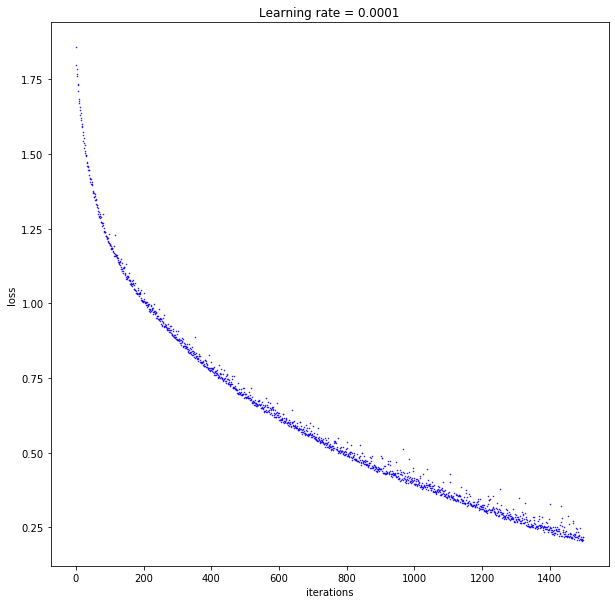

In [9]:
loss = model.history.history['loss']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Learning rate = 0.0001')
ax.set_xlabel('iterations')
ax.set_ylabel('loss')
ax.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='')

It's a 5


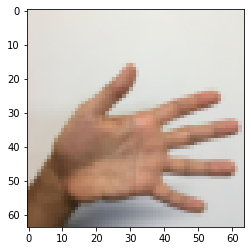

In [10]:
index = 0
plt.imshow(np.reshape(X_train[index,:], (64,64,3)))
print("It's a {}".format(np.argmax(model.predict(X_train[[index],:]))))

It's a 3


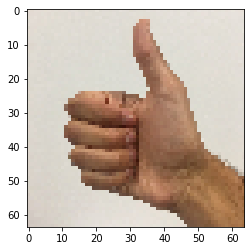

In [11]:
img = np.array(plt.imread("thumbs_up.jpg"))
img_ = np.array(Image.fromarray(img).resize((64,64)))
plt.imshow(img_)
img__ = np.reshape(img_,(1,-1))
print("It's a {}".format(np.argmax(model.predict(img__))))

It's a 1


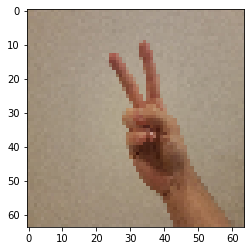

In [12]:
img = np.array(plt.imread("two_fingers.jpg"))
img_ = np.array(Image.fromarray(img).resize((64,64)))
plt.imshow(img_)
img__ = np.reshape(img_,(1,-1))
print("It's a {}".format(np.argmax(model.predict(img__))))

It's a 3


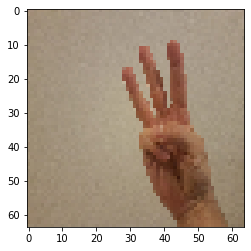

In [13]:
img = np.array(plt.imread("three_fingers.jpg"))
img_ = np.array(Image.fromarray(img).resize((64,64)))
plt.imshow(img_)
img__ = np.reshape(img_,(1,-1))
print("It's a {}".format(np.argmax(model.predict(img__))))